Code to implement a Hopfield network to denoise a grayscale image by learning from a clean reference image and iteratively updating pixel values based on the stored pattern.

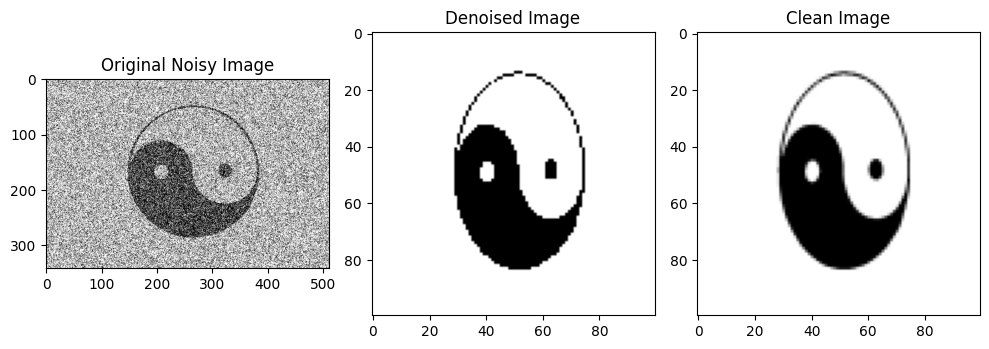

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define file paths for noisy and clean images
image_path = "/content/drive/MyDrive/noisy_image.jpg"
clean_path = "/content/drive/MyDrive/clean_image1.jpg"

# Load images in grayscale mode
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
clean_image = cv2.imread(clean_path, cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if image is None or clean_image is None:
    raise ValueError("Error: Could not load images. Check the file paths.")

# Resize images to a fixed size (100x100)
new_size = (100, 100)
gray_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
clean_image = cv2.resize(clean_image, new_size, interpolation=cv2.INTER_AREA)

# Convert images to binary values (-1 and 1) for Hopfield network processing
gray_image = np.where(gray_image > 127, 1, -1).flatten()
clean_image_flattened = np.where(clean_image > 127, 1, -1).flatten()

# Function to create Hopfield network weight matrix
def create_hopfield_network(patterns):
    n = len(patterns[0])  # Number of neurons (pixels)
    weight_matrix = np.zeros((n, n))  # Initialize weight matrix with zeros

    # Hebbian learning rule: update weights using outer product of each pattern
    for pattern in patterns:
        weight_matrix += np.outer(pattern, pattern)

    # Remove self-connections
    np.fill_diagonal(weight_matrix, 0)

    return weight_matrix / len(patterns)  # Normalize weights

# Function to denoise an image using the Hopfield network
def denoise_hopfield(noisy_image, weight_matrix, iterations=5):
    n = len(noisy_image)
    denoised_image = noisy_image.copy()

    # Iterative update based on the Hopfield network dynamics
    for _ in range(iterations):
        for i in range(n):
            sum_input = np.dot(weight_matrix[i], denoised_image)
            denoised_image[i] = 1 if sum_input >= 0 else -1

    return denoised_image

# Train the Hopfield network using the clean image
patterns = [clean_image_flattened]
weight_matrix = create_hopfield_network(patterns)

# Perform denoising using the trained Hopfield network
denoised_image = denoise_hopfield(gray_image, weight_matrix)

# Reshape the denoised image back to 2D and convert it to grayscale format
denoised_image = denoised_image.reshape(new_size)
denoised_image = np.where(denoised_image == 1, 255, 0)  # Convert back to 0-255 grayscale range

# Display original noisy, denoised, and clean images for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.subplot(1, 3, 3)
plt.imshow(clean_image, cmap='gray')
plt.title('Clean Image')

plt.tight_layout()
plt.show()

Increasing the number of neurons in the Hopfield network by increasing the image size from (100,100) to (150,150).

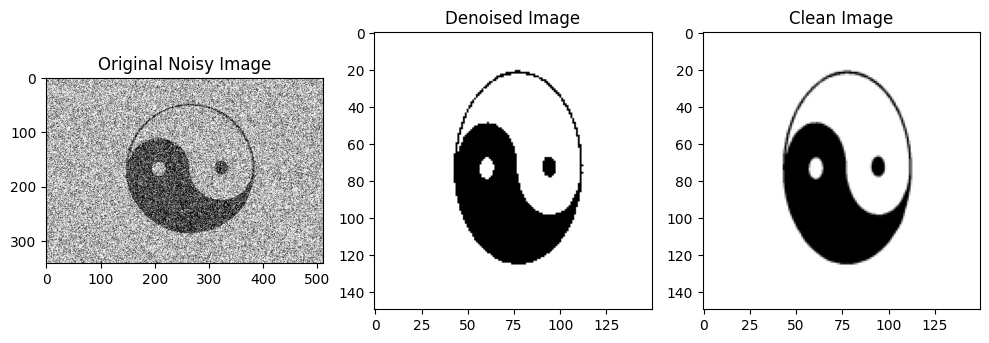

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define file paths for noisy and clean images
image_path = "/content/drive/MyDrive/noisy_image.jpg"
clean_path = "/content/drive/MyDrive/clean_image1.jpg"

# Load images in grayscale mode
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
clean_image = cv2.imread(clean_path, cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if image is None or clean_image is None:
    raise ValueError("Error: Could not load images. Check the file paths.")

# Resize images to a fixed size (100x100)
new_size = (150, 150)
gray_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
clean_image = cv2.resize(clean_image, new_size, interpolation=cv2.INTER_AREA)

# Convert images to binary values (-1 and 1) for Hopfield network processing
gray_image = np.where(gray_image > 127, 1, -1).flatten()
clean_image_flattened = np.where(clean_image > 127, 1, -1).flatten()

# Function to create Hopfield network weight matrix
def create_hopfield_network(patterns):
    n = len(patterns[0])  # Number of neurons (pixels)
    weight_matrix = np.zeros((n, n))  # Initialize weight matrix with zeros

    # Hebbian learning rule: update weights using outer product of each pattern
    for pattern in patterns:
        weight_matrix += np.outer(pattern, pattern)

    # Remove self-connections
    np.fill_diagonal(weight_matrix, 0)

    return weight_matrix / len(patterns)  # Normalize weights

# Function to denoise an image using the Hopfield network
def denoise_hopfield(noisy_image, weight_matrix, iterations=5):
    n = len(noisy_image)
    denoised_image = noisy_image.copy()

    # Iterative update based on the Hopfield network dynamics
    for _ in range(iterations):
        for i in range(n):
            sum_input = np.dot(weight_matrix[i], denoised_image)
            denoised_image[i] = 1 if sum_input >= 0 else -1

    return denoised_image

# Train the Hopfield network using the clean image
patterns = [clean_image_flattened]
weight_matrix = create_hopfield_network(patterns)

# Perform denoising using the trained Hopfield network
denoised_image = denoise_hopfield(gray_image, weight_matrix)

# Reshape the denoised image back to 2D and convert it to grayscale format
denoised_image = denoised_image.reshape(new_size)
denoised_image = np.where(denoised_image == 1, 255, 0)  # Convert back to 0-255 grayscale range

# Display original noisy, denoised, and clean images for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.subplot(1, 3, 3)
plt.imshow(clean_image, cmap='gray')
plt.title('Clean Image')

plt.tight_layout()
plt.show()

Increasing the number of neurons gives better result due to more efficient training.

Taking multiple clean images(here, 3) to train the hopfield network, instead of using one to get a more generalized weight matrix.

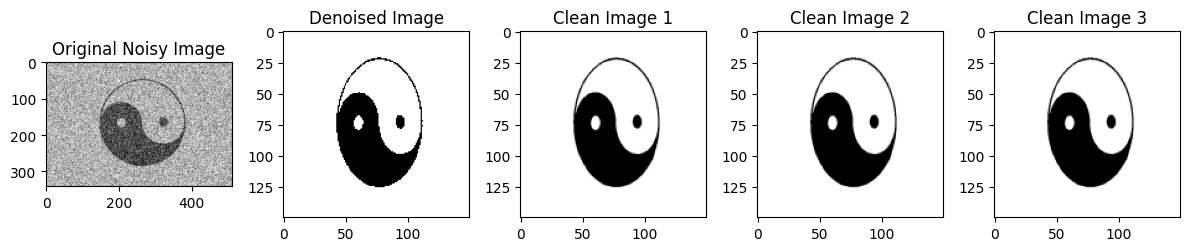

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define file paths for the noisy image and multiple clean reference images
image_path = "/content/drive/MyDrive/noisy_image.jpg"
clean_paths = [
    "/content/drive/MyDrive/clean_image1.jpg",
    "/content/drive/MyDrive/clean_image2.jpg",
    "/content/drive/MyDrive/clean_image3.jpg"
]

# Load the noisy image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Load the clean reference images in grayscale
clean_images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in clean_paths]

# Check if images are loaded correctly
if image is None or any(img is None for img in clean_images):
    raise ValueError("Error: Could not load images. Check the file paths.")

# Resize images to a fixed size (150x150 pixels) for uniform processing
new_size = (150, 150)
gray_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
clean_images = [cv2.resize(img, new_size, interpolation=cv2.INTER_AREA) for img in clean_images]

# Convert images to binary values (-1 and 1) for Hopfield network processing
gray_image = np.where(gray_image > 127, 1, -1).flatten()
clean_patterns = [np.where(img > 127, 1, -1).flatten() for img in clean_images]

# Function to create a Hopfield network and generate a weight matrix
def create_hopfield_network(patterns):
    n = len(patterns[0])  # Number of neurons (pixels in the image)
    weight_matrix = np.zeros((n, n))  # Initialize weight matrix with zeros

    # Hebbian learning: Compute outer product of each pattern and sum up
    for pattern in patterns:
        weight_matrix += np.outer(pattern, pattern)

    # Remove self-connections by setting diagonal elements to zero
    np.fill_diagonal(weight_matrix, 0)

    return weight_matrix / len(patterns)  # Normalize weights

# Function to denoise an image using the trained Hopfield network
def denoise_hopfield(noisy_image, weight_matrix, iterations=5):
    n = len(noisy_image)  # Number of pixels (neurons)
    denoised_image = noisy_image.copy()

    # Iterative update using Hopfield dynamics
    for _ in range(iterations):
        for i in range(n):
            sum_input = np.dot(weight_matrix[i], denoised_image)  # Compute neuron activation
            denoised_image[i] = 1 if sum_input >= 0 else -1  # Update neuron state

    return denoised_image

# Train the Hopfield network using the clean reference images
weight_matrix = create_hopfield_network(clean_patterns)

# Perform denoising using the trained Hopfield network
denoised_image = denoise_hopfield(gray_image, weight_matrix)

# Reshape the denoised image back to 2D and convert to grayscale format
denoised_image = denoised_image.reshape(new_size)
denoised_image = np.where(denoised_image == 1, 255, 0)  # Convert binary values back to 0-255 grayscale range

# Display the original noisy image, denoised image, and clean reference images for comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Noisy Image')

plt.subplot(1, 5, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

# Display the clean reference images
for i, clean_img in enumerate(clean_images, start=3):
    plt.subplot(1, 5, i)
    plt.imshow(clean_img, cmap='gray')
    plt.title(f'Clean Image {i-2}')

plt.tight_layout()
plt.show()